In [57]:
import pandas as pd 
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", header=0, index_col=0, parse_dates=True, na_values=-99.99)

In [58]:
me_m.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [62]:
rets = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", index_col=0, parse_dates=True, na_values=-99.99)

# Consider only Low 10 and High 10, i.e., Small Caps and Large Caps
# Moreover, divide by 100, since they are returns, and change the index to datatime
rets = rets[["Lo 10", "Hi 10"]] / 100
rets.columns = ["Small Caps", "Large Caps"]
rets.index = pd.to_datetime(rets.index, format="%Y%m")   #.to_period("M") forces the index to be monthly period...
rets.head()

,Small Caps,Large Caps
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


<AxesSubplot:>

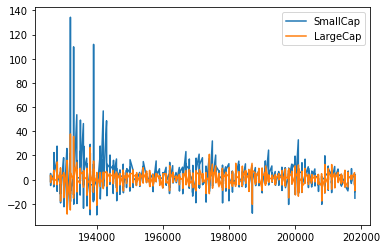

In [16]:
rets.plot.line()

In [54]:
rets.index

PeriodIndex(['1926-01', '1926-01', '1926-01', '1926-01', '1926-01', '1926-01',
             '1927-01', '1927-01', '1927-01', '1927-01',
             ...
             '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01',
             '2018-01', '2018-01', '2018-01', '2018-01'],
            dtype='period[M]', length=1110, freq='M')

In [50]:
rets["1975"]

<ipython-input-50-968df3c41f0f>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  rets["1975"]


,SmallCap,LargeCap
1975-01,32.02,12.86
1975-01,6.57,6.13
1975-01,9.89,4.14
1975-01,2.88,5.31
1975-01,8.11,6.10
1975-01,7.79,5.24
1975-01,2.18,-7.03
1975-01,-5.25,-1.77
1975-01,-3.51,-4.68
1975-01,-0.09,6.20


In [41]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-01 to 2018-01
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 58.3 KB


# Compute the drowdown

In [65]:
wealth_index = 1000 * (1 + rets).cumprod()
wealth_index.head()

,Small Caps,Large Caps
1926-07-01,985.500000,1032.900000
1926-08-01,1035.957600,1071.117300
1926-09-01,1045.592006,1078.293786
1926-10-01,994.985353,1052.091247
1926-11-01,987.224467,1080.497711


<AxesSubplot:>

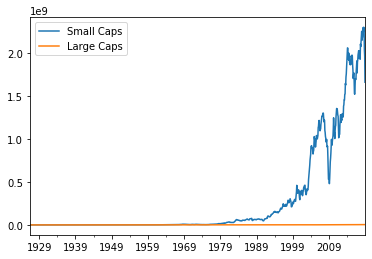

In [66]:
wealth_index.plot.line()

In [67]:
previuos_peak = wealth_index.cummax()

<AxesSubplot:>

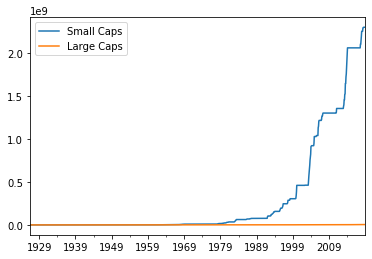

In [69]:
previuos_peak.plot.line()

<AxesSubplot:>

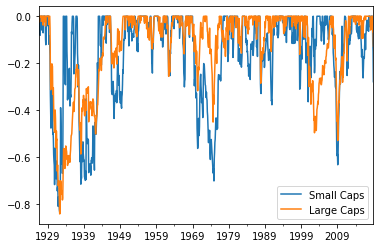

In [70]:
drawdown = (wealth_index - previuos_peak)/ previuos_peak
drawdown.plot()

In [71]:
drawdown.head()

,Small Caps,Large Caps
1926-07-01,0.000000,0.0000
1926-08-01,0.000000,0.0000
1926-09-01,0.000000,0.0000
1926-10-01,-0.048400,-0.0243
1926-11-01,-0.055822,0.0000


In [72]:
drawdown.min()

Small Caps   -0.833001
Large Caps   -0.840038
dtype: float64

In [73]:
drawdown["1975":].idxmin()

Small Caps   2009-02-01
Large Caps   2009-02-01
dtype: datetime64[ns]

In [92]:
def drawdown(return_series: pd.Series):
    """
    takes a timeseries of an asset return 
    """
    wealth_index = 1000 * (1+return_series).cumprod()
    previuos_peak = wealth_index.cummax()
    drawdown = (wealth_index - previuos_peak)/ previuos_peak
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previuos_peak,
        "Drawdown": drawdown
    })

In [93]:
drawdown(rets["Large Caps"]).head()

,Wealth,Peaks,Drawdown
1926-07-01,1032.900000,1032.900000,0.0000
1926-08-01,1071.117300,1071.117300,0.0000
1926-09-01,1078.293786,1078.293786,0.0000
1926-10-01,1052.091247,1078.293786,-0.0243
1926-11-01,1080.497711,1080.497711,0.0000


<AxesSubplot:>

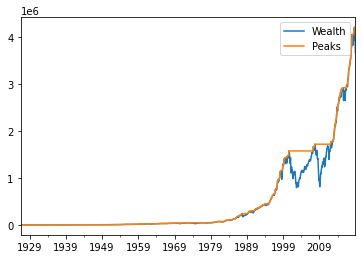

In [95]:
drawdown(rets["Large Caps"])[["Wealth", "Peaks"]].plot()

<AxesSubplot:>

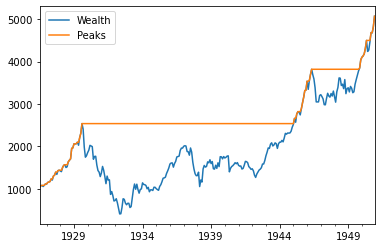

In [96]:
drawdown(rets[:"1950"]["Large Caps"])[["Wealth", "Peaks"]].plot()